[4, 1]
[0, 1]
[4, 3]
[3, 0]
Observation : [1,3], Reward: 0
3
Observation : [3,0], Reward: -1
3
Observation : [3,0], Reward: -1
2
Observation : [3,1], Reward: 0
2
Observation : [3,2], Reward: 0
1
Observation : [2,2], Reward: 0
0
Observation : [3,2], Reward: 0
3
Observation : [3,1], Reward: 0
0
Observation : [4,1], Reward: 0
2
Observation : [0,1], Reward: 10
0
Observation : [1,1], Reward: 0
3
Observation : [1,0], Reward: 0
0
Observation : [2,0], Reward: 0
3
Observation : [2,0], Reward: -1
2
Observation : [2,1], Reward: 0
1
Observation : [1,1], Reward: 0
3
Observation : [1,0], Reward: 0
1
Observation : [0,0], Reward: 0
3
Observation : [0,0], Reward: -1
1
Observation : [0,0], Reward: -1
2
Observation : [0,1], Reward: 0
0
Observation : [1,1], Reward: 0
3
Observation : [1,0], Reward: 0
3
Observation : [1,0], Reward: -1
3
Observation : [1,0], Reward: -1
2
Observation : [1,1], Reward: 0
3
Observation : [1,0], Reward: 0
2
Observation : [1,1], Reward: 0
1
Observation : [0,1], Reward: 0
0
Observa

Text(0,0.5,'y')

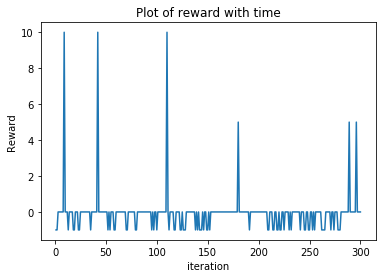

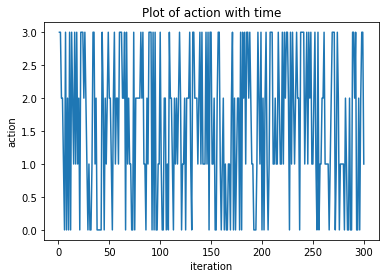

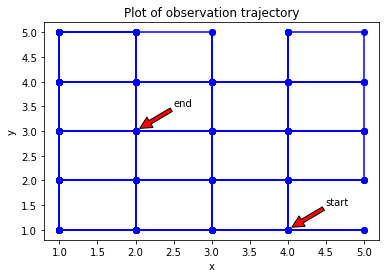

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep  2 10:52:56 2018

@author: sreen
"""

import logging
import math
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
#import matplotlib.pyplot as plt
%matplotlib inline

logger = logging.getLogger(__name__) 

#global Ar,Ac,A_r,A_c,Br,Bc,B_r,B_c,low,high
global A,A_,B, B_, low, high
A = [4,1]
A_ = [0,1]
B = [4,3]
B_ = [2,3]
#Ar = 4
#Ac = 1
#A_r = 0
#A_c = 1
#Br = 4
#Bc = 3
#B_r = 2
#B_c = 3
low = 0
high = 4
rangelist = range(0,5)

class GridWorldEnv(gym.Env):
    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second' : 1
                }
    def __init__(self):
        grid_map = np.zeros((5,5))
        grid_dim_x,grid_dim_y = grid_map.shape
        self.actionspace = spaces.Discrete(4)
        #self.actioncoord = {'0': [1,0],'1':[-1,0],'2':[0,1], '3':[0,-1]}
        #print(self.actioncoord[0][0])
        self.actioncoord = [[1,0],[-1,0],[0,1],[0,-1]]
        self._seed()
        self.viewer = None
        self.state = None
        self.state = list(np.random.randint(low,high,size=(2,)))
        print(self.state)
        
        
    def _seed(self, seed = None):
        self.np_random,seed = seeding.np_random(seed)
        return [seed]
    
    def step(self,action):
        #assert self.action_space.contains(action),"%r (%s) invalid"%(action,type(action))
        #global reward, Tset, low, high, Twi, Tai, fa
        global A,A_,B, B_, low, high,rangelist
        action =  int(action)
        print(action)
        if (self.state == A):
            reward = 10
            self.state = A_
        elif (self.state==B):
            reward = 5
            self.state = B_
        else:
            new_agent_state = [self.state[0]+self.actioncoord[action][0],self.state[1]+self.actioncoord[action][1]]
            if (new_agent_state[0] in rangelist) and (new_agent_state[1] in rangelist):
                self.state = new_agent_state
                reward = 0
                pass
            else:
                reward = -1
        return self.state,reward,False,{}
    
    def reset(self):
        global low, high
        self.state = list(np.random.randint(low,high,size=(2,)))
        print(self.state)
        #self.steps_beyond_done = 0
        return np.array(self.state)

    def render(self, mode='human'):
        screen_width = 500
        screen_height = 500
        fac = 100
        x,y = self.state
        x+=1
        y+=1
        
        if self.viewer is None:
            from gym.envs.classic_control import rendering
            self.viewer = rendering.Viewer(screen_width,screen_height)
            for i in range(6):
                line_start_x = (0,i*fac)
                line_end_x = (5*fac,i*fac)
                line_start_y = (i*fac,0)
                line_end_y = (i*fac,5*fac)
                line1 = self.viewer.draw_line(line_start_x,line_end_x)
                self.viewer.add_geom(line1)
                line2 = self.viewer.draw_line(line_start_y,line_end_y)
                self.viewer.add_geom(line2)
            box_size = 30
            left, right, top, bottom = -box_size, +box_size, +box_size, -box_size
            box = rendering.FilledPolygon([(left, bottom), (left, top), (right, top), (right, bottom)])
            self.box_trans = rendering.Transform()
            box.add_attr(self.box_trans)
            box.set_color(.8, .4, .4)
            self.viewer.add_geom(box)

        if self.state is None:
            return None

        self.box_trans.set_translation((x-0.5)*100, (y-0.5)*100)

        return self.viewer.render(return_rgb_array=mode == 'rgb_array')


env = GridWorldEnv()
reward = 0
reward_list = []
action_list = []
x_list = []
y_list = []
iteration = [test+1 for test in range(300)]

#Plotting Reward observation over T time steps
for t in range(300):
    env.render()
    print('Observation : [%s], Reward: %d'%(','.join(map(str,observation)),reward))
    action = env.actionspace.sample()
    observation, reward, done, info = env.step(action)
    reward_list.append(reward)
    action_list.append(action)
    x_list.append(observation[0]+1)
    y_list.append(observation[1]+1)
        
plt.figure(1)
plt.title('Plot of reward with time')
plt.plot(iteration,reward_list)
plt.xlabel('iteration')
plt.ylabel('Reward')

plt.figure(2)
plt.title('Plot of action with time')
plt.plot(iteration,action_list)
plt.xlabel('iteration')
plt.ylabel('action')

fig = plt.figure(3)
ax = fig.add_subplot(111)
plt.title('Plot of observation trajectory')
plt.plot(x_list,y_list,'bo-')
ax.annotate('start', xy=(x_list[0]+0.05, y_list[0]+0.05), xytext=(x_list[0]+0.5, y_list[0]+0.5), arrowprops=dict(facecolor='Red', shrink=0.01),)
ax.annotate('end', xy=(x_list[-1]+0.05, y_list[-1]+0.05), xytext=(x_list[-1]+0.5, y_list[-1]+0.5), arrowprops=dict(facecolor='Red', shrink=0.01),)
plt.xlabel('x')
plt.ylabel('y')